## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 2*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


Invertir y binarizar la imagen fingerprint.jpeg a continuación. Luego, aplicar transformaciones morfológicas adecuadas para remover y restaurar la imagen.



#### *Importar librerías*

Como primer paso, se importan las librerias


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, io, filters, util
from skimage.morphology import binary_opening, binary_closing, binary_dilation, binary_erosion
from skimage.morphology import skeletonize, binary_dilation, label


#### *Cargar imágen*

Luego, se carga la imagen y se binariza.

In [2]:
# Cargar imagen
image_path = 'img/fingerprint.jpeg'
image = io.imread(image_path, as_gray=True)

# ------------------------------------------

# Filtro Gaussiano para suavizar la imagen
smoothed_image = filters.gaussian(image, sigma=1)

# Se binariza la imagen usando el método de Otsu
thresh = filters.threshold_otsu(smoothed_image)
binary_image = smoothed_image > thresh

# Se invierte la imagen binarizada
inverted_image = util.invert(binary_image)


#### *Operaciones Morfológicas*

Posteriormente, se realizan operaciones morfológicas para restaurar la imagen.

In [3]:
selem = morphology.disk(2)

# Se usa remove_small_objects para eliminar los objetos pequeños
cleaned_image = morphology.remove_small_objects(inverted_image, min_size=64)

# Se aplica opening para eliminar el ruido
opened_image = binary_opening(cleaned_image, selem)

# Se aplica closing para cerrar los huecos
closed_image = binary_closing(opened_image, selem)

# Se aplica dilation para cerrar los huecos
dilated_image = binary_dilation(opened_image, selem)

# Se aplica erosion para eliminar los detalles finos
eroded_image = binary_erosion(dilated_image, selem)

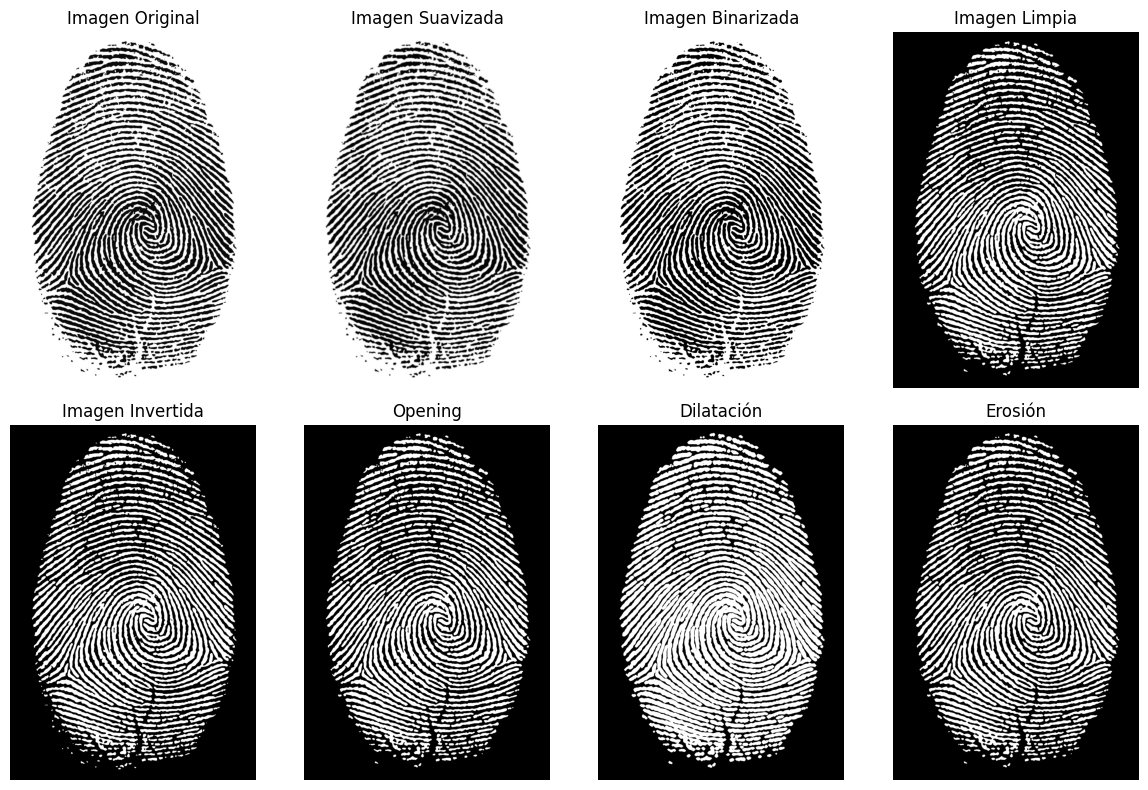

In [4]:
# Visualizar la imagen en diferentes pasos del procesamiento
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Imagen Original')
ax[0].axis('off')

ax[1].imshow(smoothed_image, cmap='gray')
ax[1].set_title('Imagen Suavizada')
ax[1].axis('off')

ax[2].imshow(binary_image, cmap='gray')
ax[2].set_title('Imagen Binarizada')
ax[2].axis('off')

ax[3].imshow(cleaned_image, cmap='gray')
ax[3].set_title('Imagen Limpia')
ax[3].axis('off')

ax[4].imshow(inverted_image, cmap='gray')
ax[4].set_title('Imagen Invertida')
ax[4].axis('off')

ax[5].imshow(opened_image, cmap='gray')
ax[5].set_title('Opening')
ax[5].axis('off')

ax[6].imshow(dilated_image, cmap='gray')
ax[6].set_title('Dilatación')
ax[6].axis('off')

ax[7].imshow(eroded_image, cmap='gray')
ax[7].set_title('Erosión')
ax[7].axis('off')



plt.tight_layout()
plt.show()

In [5]:
# Como la parte de arriba es la que tiene mas lineas discontinuas, se aplica un opening para eliminarlas
h, w = image.shape
top_part = closed_image[:int(h*0.2)]  
top_part_closed = morphology.binary_closing(top_part, morphology.disk(5))


(-0.5, 999.5, 287.5, -0.5)

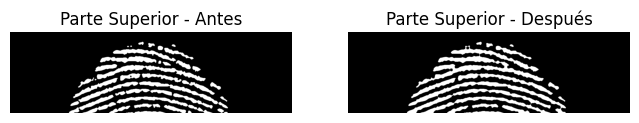

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(top_part, cmap='gray')
ax[0].set_title('Parte Superior - Antes')
ax[0].axis('off')

ax[1].imshow(top_part_closed, cmap='gray')
ax[1].set_title('Parte Superior - Después')
ax[1].axis('off')

In [7]:
# Se reemplaza la parte superior de la imagen original por la parte superior cerrada
closed_image[:int(h*0.2)] = top_part_closed

In [8]:
# Como la parte de abajo es la que tiene mas lineas puntos, se le aplica closing para eliminarlas
bottom_part = closed_image[int(h*0.8):]
bottom_part_closed = morphology.binary_closing(bottom_part, morphology.disk(2))

(-0.5, 999.5, 288.5, -0.5)

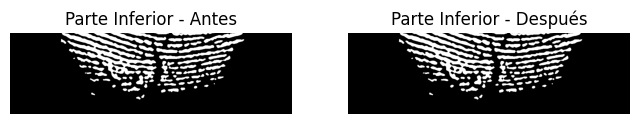

In [9]:
# Visualizar la parte inferior antes y después del procesamiento
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(bottom_part, cmap='gray')
ax[0].set_title('Parte Inferior - Antes')
ax[0].axis('off')

ax[1].imshow(bottom_part_closed, cmap='gray')
ax[1].set_title('Parte Inferior - Después')
ax[1].axis('off')

In [10]:
# Se reemplaza la parte inferior de la imagen original por la parte inferior cerrada
closed_image[int(h*0.8):] = bottom_part_closed

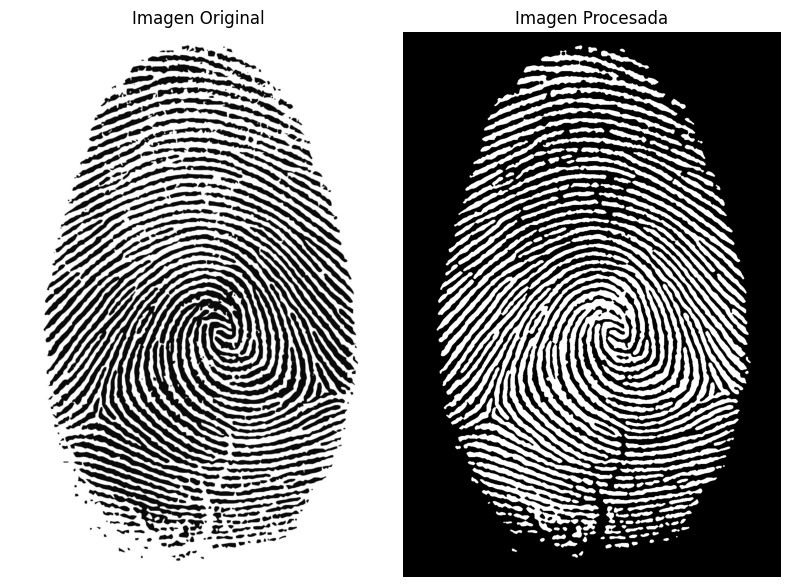

In [11]:
# Resultado
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Imagen Procesada')
plt.axis('off')
plt.tight_layout()
plt.show()



#### *Operaciones adicionales*

Finalmente, para intentar mejorar aún más la imagen, se realiza la esqueletización de la misma. 

En este caso, se cree que esta operación es útil ya que una huella dactilar es una imagen con bordes muy finos y con muchas ramificaciones. Por lo tanto, la esqueletización puede ayudar a mejorar la imagen.

In [12]:
# Esqueletización de la imagen
skeleton = skeletonize(closed_image)

# Dilatación de la imagen esqueletizada
dilated_skeleton = binary_dilation(skeleton, morphology.disk(4))

# Se cplica gaussian smothing
smoothed_skeleton = filters.gaussian(dilated_skeleton, sigma=0.5)

# Se convierte la imagen esqueletizada a una imagen binaria
final_image = smoothed_skeleton > 0.5

# Closing para cerrar los huecos
closed_skeleton = binary_closing(final_image, morphology.disk(3))

# Dilation para cerrar los huecos
dilated_skeleton = binary_dilation(closed_skeleton, morphology.disk(2))


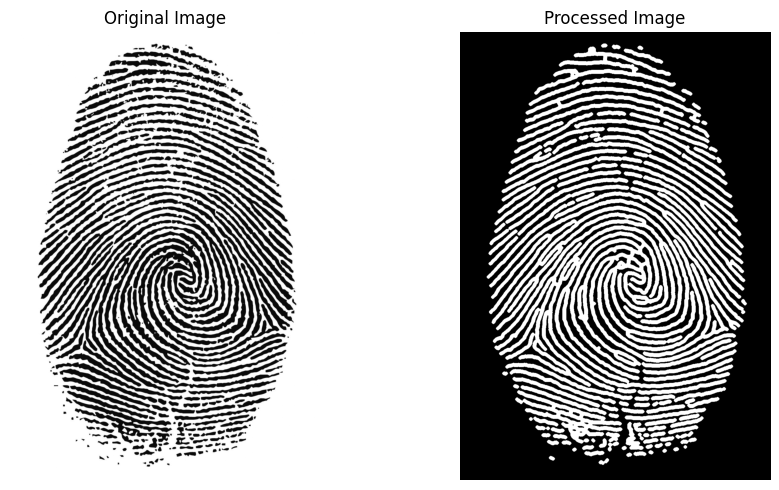

In [13]:
# Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(dilated_skeleton, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()